In [1]:
import numpy as np # linear algebra
import pandas as pd # read pd.read_csv

In [2]:
# To Ignore Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
bikeSharing = pd.read_csv('day.csv')
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikeSharing.shape

(730, 16)

In [5]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# calculate % of missing values in each column
round(100*(bikeSharing.isnull().sum()/len(bikeSharing)), 2).sort_values(ascending=False)
# no null values identified below

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

In [7]:
bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Preparation and Visualizations

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# set the style for seaborn plots


sns.set(style="whitegrid")
%matplotlib inline

### Drop unnessasary variables

In [9]:
#Drop the instant and dteday as it is insignificant with data
bikeSharing.drop(['instant','dteday','casual','registered'],inplace=True,axis=1)
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Convert the categorical variables

In [10]:
bikeSharing['season'] = bikeSharing['season'].map({1:'spring',2:'summer', 3:'fall', 4:'winter'})
bikeSharing['mnth'] = bikeSharing['mnth'].map({1:'Jan',2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
bikeSharing['weekday'] = bikeSharing['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
bikeSharing['weathersit'] = bikeSharing['weathersit'].map({1:'Clear-Partlycloudy',2:'Mist-Cloudy',3:'LightSnow-lightRain-Thunderstorm',4:'HeavyRain-IcePallets-Thunderstorm'})

bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist-Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist-Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear-Partlycloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear-Partlycloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear-Partlycloudy,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Data Visualization of Categorical Variables

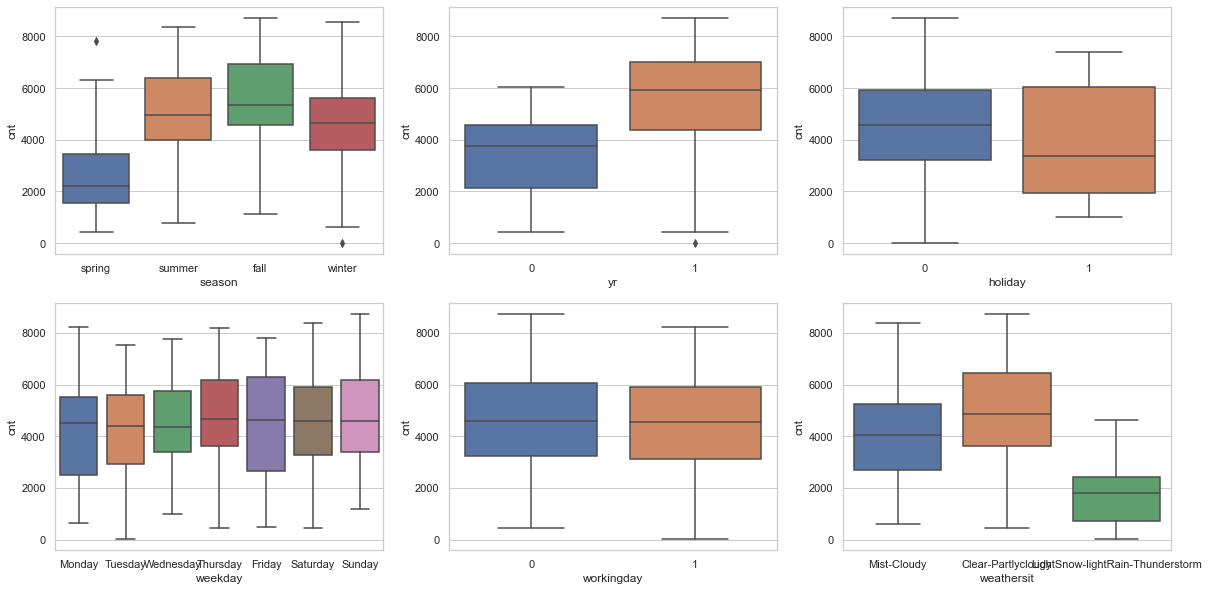

In [12]:
def boxplot_catg_var(cat_var,target):
    plt.figure(figsize=(20, 10))
    for i in range(0,len(cat_var)):
        plt.subplot(2,3,i+1)
        sns.boxplot(x = cat_var[i], y = target, data = bikeSharing)
    plt.show()

cat_var =['season','yr','holiday','weekday','workingday','weathersit']
boxplot_catg_var(cat_var,'cnt')

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

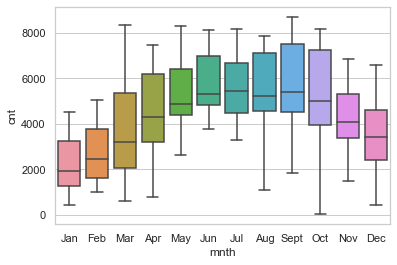

In [13]:
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeSharing)

### Inferences:

### Seasonal Trends:
Approximately 32% of the bike booking was happening in fall with a median of over 5000 booking for the period of 2 years, followed by summer & winter with 27% & 25% of total booking. This shows, season can be a good predictor for the dependent variable. 

#### Yearly Trends:
Approximately 99% of the bike booking was increased in year with median of close to previus year booking for the period of 2 years. This shows, year can be a good predictor for the dependent variable 

#### Weather Dependency:
Approximately 67% of the bike booking was happening during ‘Clear-Partlycloudy with a median of close to 5000 booking for the period of 2 years. This was followed by Mist-Cloudy with 30% of total booking. This shows, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable. 

#### Holiday Trends:
Approximately 97.6% of the bike booking was happening when it is not a holiday which means this data is clearly biased. This shows, holiday cannot be a good predictor for the dependent variable. 

#### Weekday Trends:
Weekday variable shows very close trend between 13.5%-14.8% of total booking on all days of the week having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. Let the model decide if this needs to be added or not. 

#### Workingday Trends:
Approximately 69% of the bike booking was happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This shows, workingday can be a good predictor for the dependent variable 

#### Monthly Trends:
Approximately 10% of the bike booking was happening in the months may,jun,jul,aug & sept with a median of over 4000 booking per month. This shows, month has some trend for bookings and can be a good predictor for the dependent variable.

In [14]:
### Dummy Variables

In [15]:
# Map function defining
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Apply this function to the bikeSharing

bikeSharing = dummies('season',bikeSharing)
bikeSharing = dummies('mnth',bikeSharing)
bikeSharing = dummies('weekday',bikeSharing)
bikeSharing = dummies('weathersit',bikeSharing)
bikeSharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow-lightRain-Thunderstorm,Mist-Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
bikeSharing.shape

(730, 30)

In [17]:
bikeSharing.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow-lightRain-Thunderstorm,Mist-Cloudy
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.028767,0.336986
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model Building
Assumptions are as below:
    
- Multivariate normality
- Linear relationship
- No or little multicollinearity
- No auto-correlation
- Homoscedasticity

### Splitting the Data into Training and Testing Sets

In [18]:
from sklearn.model_selection import train_test_split

# We specify this so as the train and test data set always have the same rows, respectively
np.random.seed(0)

df_train, df_test = train_test_split(bikeSharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [19]:
df_train.shape

(510, 30)

In [20]:
df_test.shape

(219, 30)

### Visualising Numeric Variables
Creating a pairplot of all the numeric variables

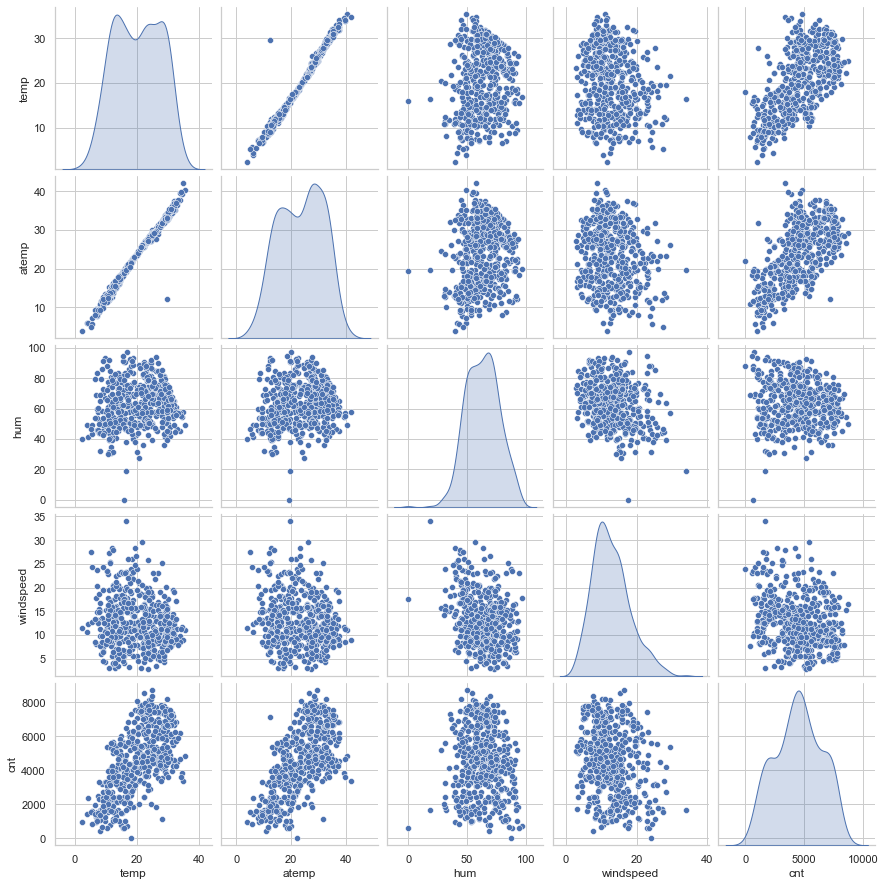

In [21]:
sns.pairplot(df_train[[ 'temp','atemp', 'hum', 'windspeed','cnt']],diag_kind='kde')
plt.show()
# Patterns between variables are easily identified below

- Above Pair-Plot shows that there is a LINEAR RELATION between 'temp', 'atemp' and 'cnt' , both variables has close values, we will predict with model to remove one variable¶

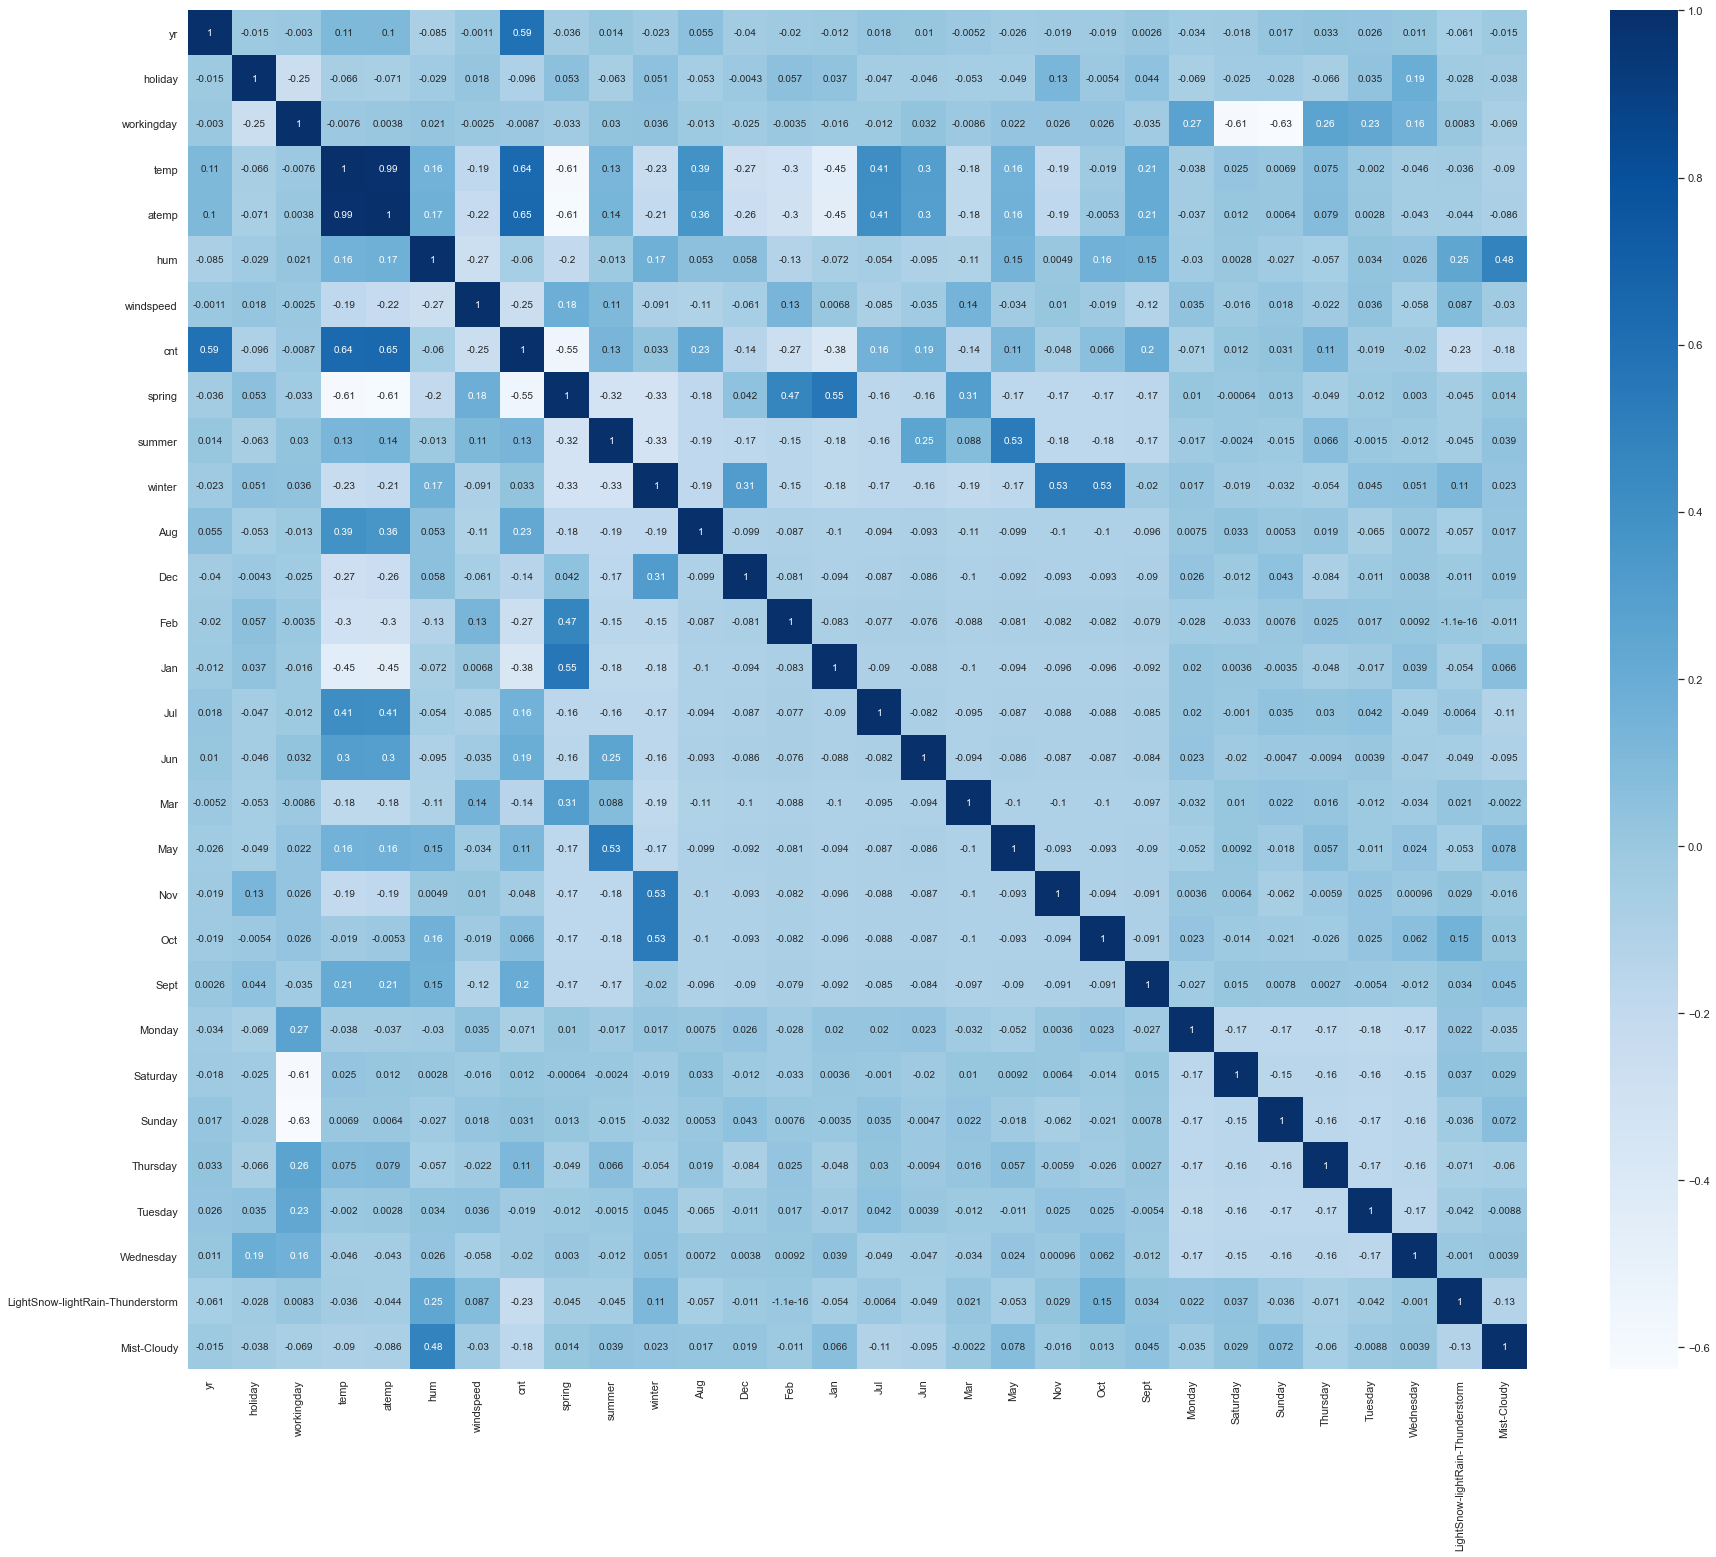

In [22]:
#Correlation with heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="Blues")
plt.show()

### Inferences:
The heatmap shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
We will be refering this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

### Rescaling the Features with MinMax scaling.


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [24]:
# Applying scaler() to all columns except the 'dummy' variables
num_vars = ['temp','atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow-lightRain-Thunderstorm,Mist-Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [25]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow-lightRain-Thunderstorm,Mist-Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Divide into X and Y sets for the model building

In [26]:
y_train = df_train.pop('cnt')
X_train = df_train

### RFE: Recursive feature elimination


In [27]:
# Import RFE libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
# Running RFE with output number equal to 15
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [29]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sept', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 8),
 ('Wednesday', False, 11),
 ('LightSnow-lightRain-Thunderstorm', True, 1),
 ('Mist-Cloudy', True, 1)]

In [30]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sept',
       'LightSnow-lightRain-Thunderstorm', 'Mist-Cloudy'],
      dtype='object')

In [31]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Building model using statsmodel for detailed statistics

In [32]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,Dec,Jan,Jul,Nov,Sept,LightSnow-lightRain-Thunderstorm,Mist-Cloudy
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1


In [33]:
def build_models(X,y):
    X = sm.add_constant(X) #adding the constant here
    lm = sm.OLS(y,X).fit() #fitting the model here
    print(lm.summary()) # model summary here
    return X
    
def checkVIFs(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### MODEL 1

In [34]:
X_train_new = build_models(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 09 May 2021   Prob (F-statistic):          3.34e-189
Time:                        09:42:51   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### Inference:

- p-vale of Jan seems to be higher than the significance value of 0.05, therefore dropping it as it is insignificant in presence of other variables.

In [35]:
#Calculat the Variance Inflation Factor
checkVIFs(X_train_new)

,Features,VIF
0,const,82.48
6,spring,5.27
3,temp,4.42
8,winter,3.83
7,summer,2.76
4,hum,1.93
12,Nov,1.76
10,Jan,1.68
15,Mist-Cloudy,1.57
9,Dec,1.49


In [36]:
X_train_new=X_train_new.drop(["Jan"], axis = 1)

### MODEL 2

In [37]:
X_train_new = build_models(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Sun, 09 May 2021   Prob (F-statistic):          4.24e-189
Time:                        09:42:51   Log-Likelihood:                 511.73
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     495   BIC:                            -929.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [38]:
#Calculating the Variance Inflation Factor
checkVIFs(X_train_new)

,Features,VIF
0,const,78.28
6,spring,5.24
3,temp,3.95
8,winter,3.77
7,summer,2.71
4,hum,1.91
11,Nov,1.73
14,Mist-Cloudy,1.57
10,Jul,1.48
9,Dec,1.40


In [39]:
# As holiday has high P value will drop it
X_train_new=X_train_new.drop(["holiday"], axis = 1)

### MODEL 3

In [40]:
X_train_new = build_models(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.7
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.70e-187
Time:                        09:42:51   Log-Likelihood:                 505.15
No. Observations:                 510   AIC:                            -982.3
Df Residuals:                     496   BIC:                            -923.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [41]:
#Calculat the Variance Inflation Factor
checkVIFs(X_train_new)

,Features,VIF
0,const,78.28
5,spring,5.23
2,temp,3.95
7,winter,3.77
6,summer,2.71
3,hum,1.91
10,Nov,1.70
13,Mist-Cloudy,1.57
9,Jul,1.48
8,Dec,1.40


In [42]:
# Spring has high VIF and p value, will drop it
X_train_new=X_train_new.drop(["spring"], axis = 1)

### MODEL 4

In [43]:
X_train_new = build_models(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.5
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.87e-186
Time:                        09:42:51   Log-Likelihood:                 499.88
No. Observations:                 510   AIC:                            -973.8
Df Residuals:                     497   BIC:                            -918.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [44]:
#Calculat the Variance Inflation Factor
checkVIFs(X_train_new)

,Features,VIF
0,const,45.65
6,winter,1.96
3,hum,1.89
2,temp,1.69
9,Nov,1.64
12,Mist-Cloudy,1.55
8,Jul,1.43
7,Dec,1.37
5,summer,1.33
11,LightSnow-lightRain-Thunderstorm,1.24


- P values 0 and VIF less than 2, now we check for correlation between remaining varibales

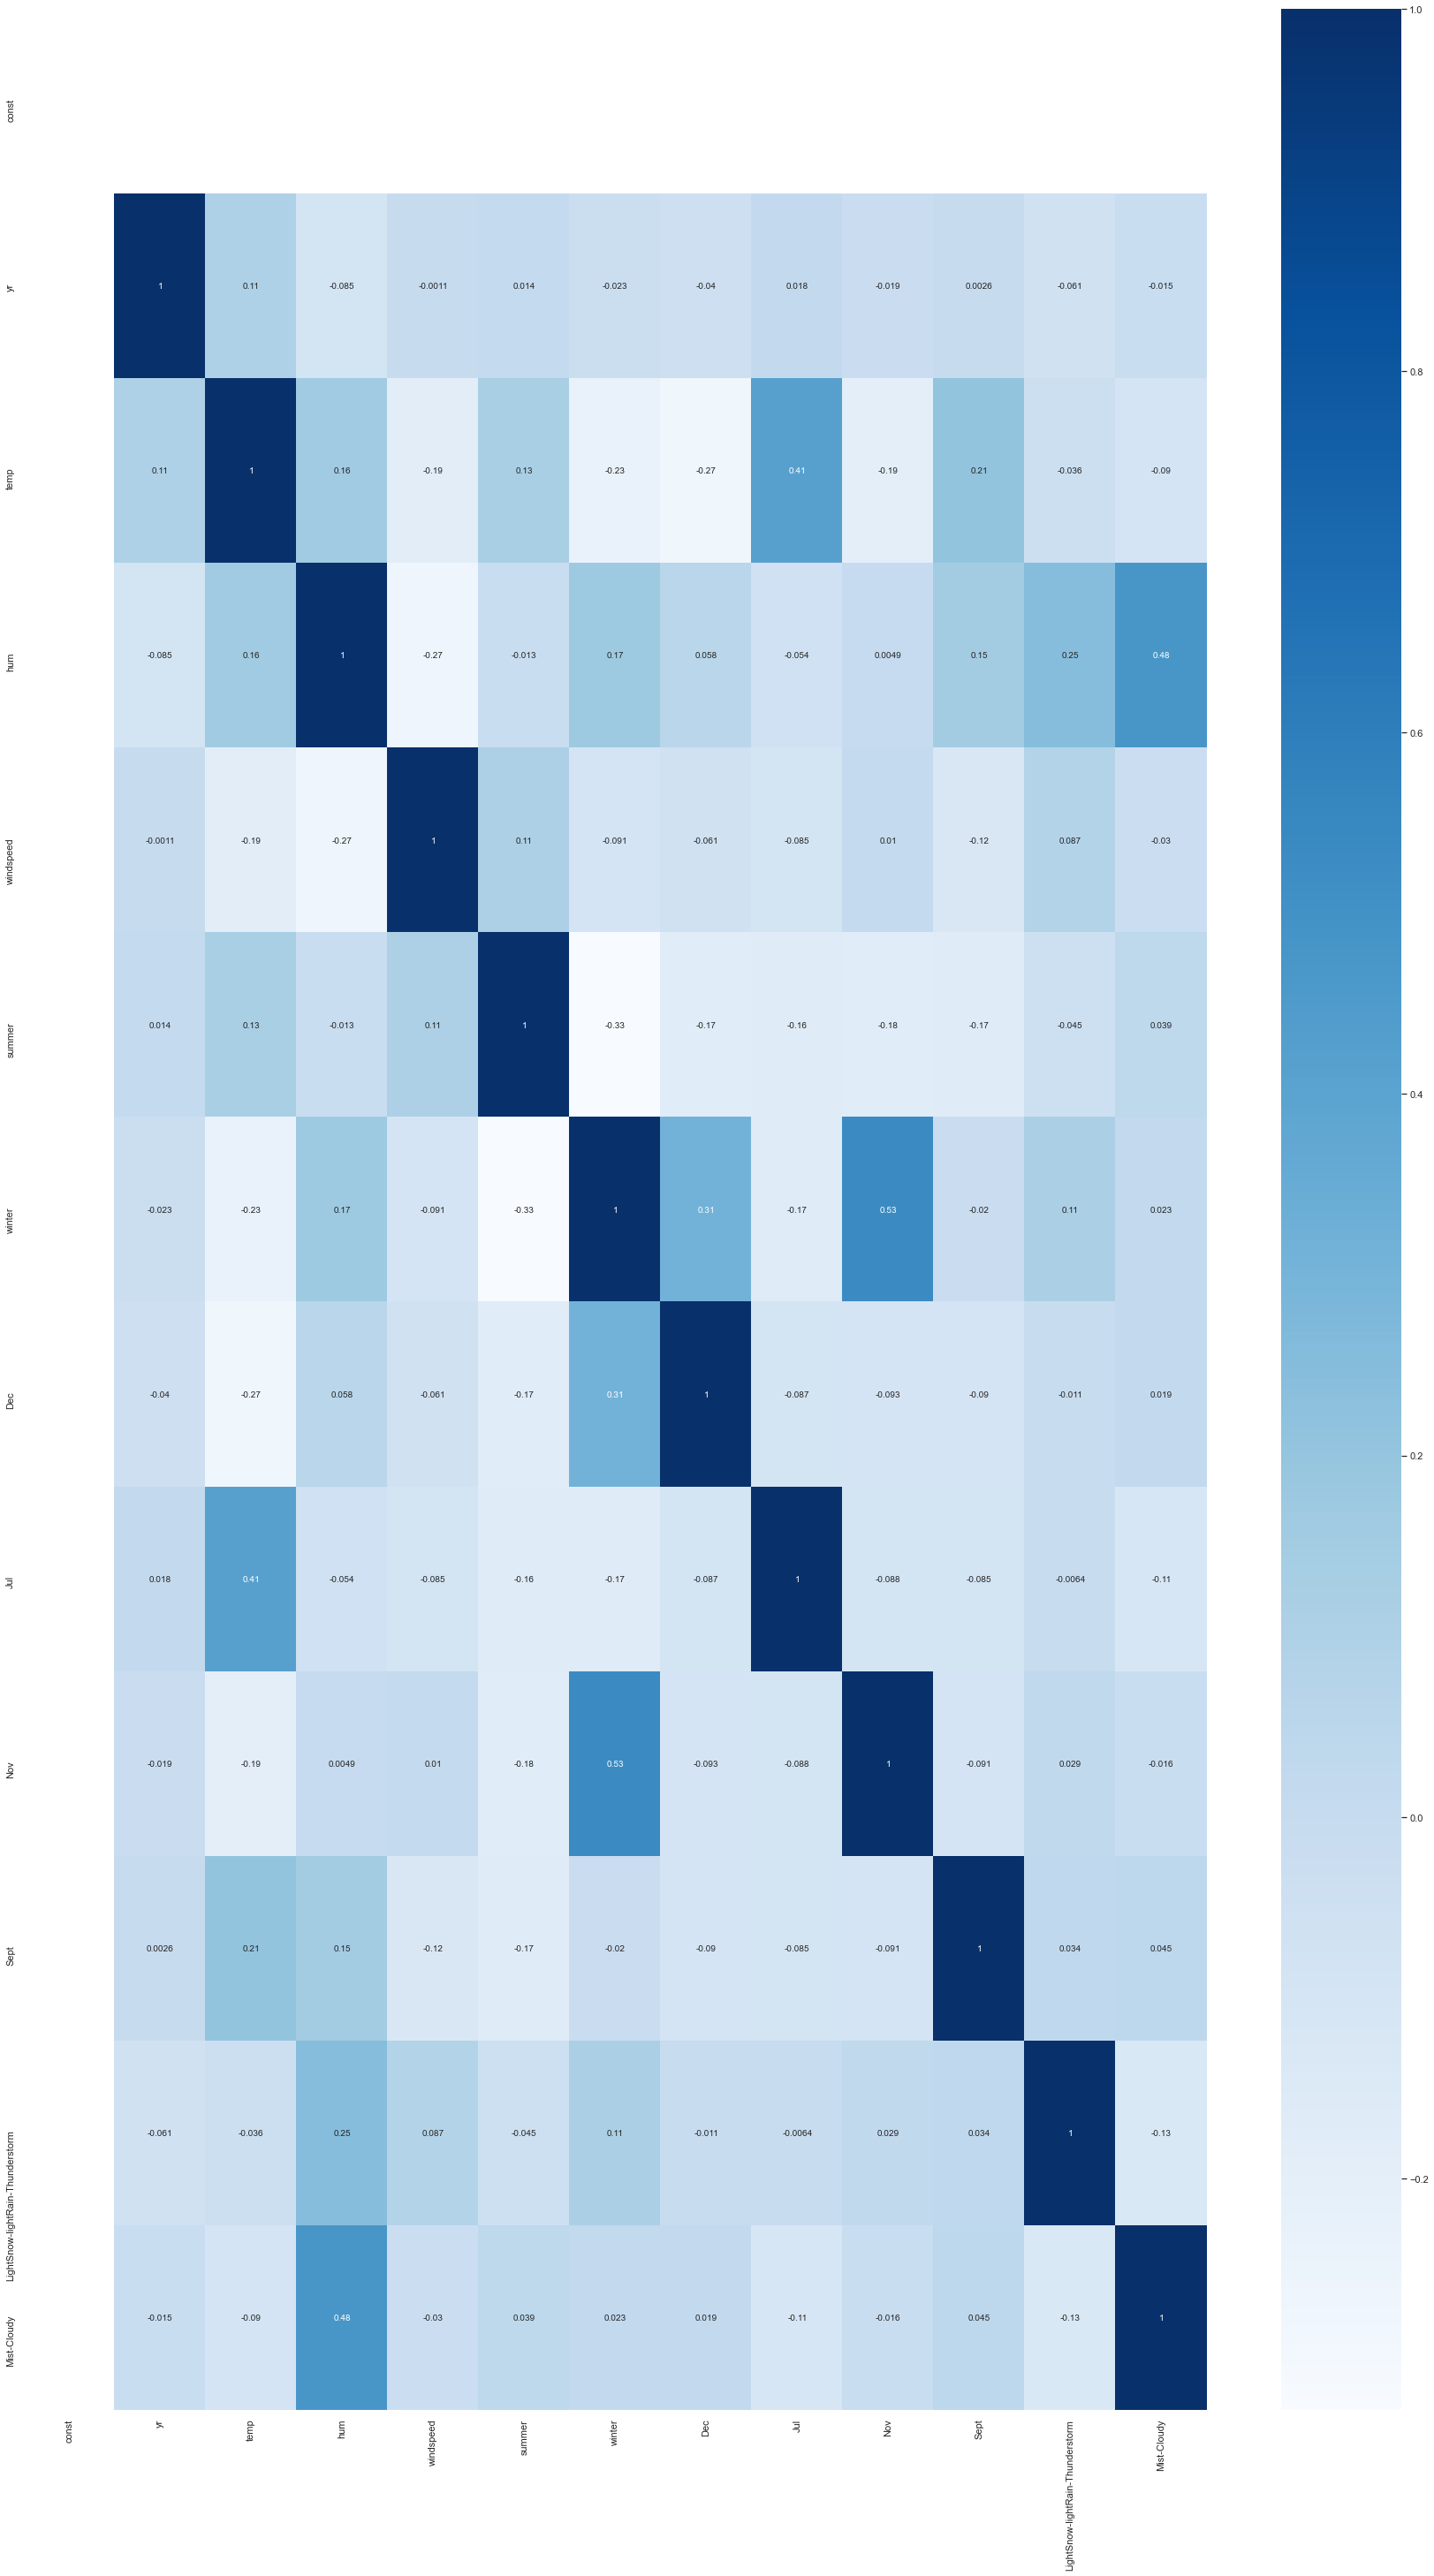

In [45]:
#Correlation using heatmap
plt.figure(figsize = (30, 50))
sns.heatmap(X_train_new.corr(), annot = True, cmap="Blues")
plt.show()

In [46]:
#Calculat the Variance Inflation Factor
checkVIFs(X_train_new)

,Features,VIF
0,const,45.65
6,winter,1.96
3,hum,1.89
2,temp,1.69
9,Nov,1.64
12,Mist-Cloudy,1.55
8,Jul,1.43
7,Dec,1.37
5,summer,1.33
11,LightSnow-lightRain-Thunderstorm,1.24


In [53]:
#Calculat the Variance Inflation Factor
checkVIFs(X_train_new)

,Features,VIF
0,const,45.65
6,winter,1.96
3,hum,1.89
2,temp,1.69
9,Nov,1.64
12,Mist-Cloudy,1.55
8,Jul,1.43
7,Dec,1.37
5,summer,1.33
11,LightSnow-lightRain-Thunderstorm,1.24


### Inferences
This model now looks perfect with :
9 variables and R-squared- 83.3  
Adj. R-squared- 83
VIF less than - 2
P values - 0
Prob (F-statistic) - almost equal to - 0

### Residual Analysis of Model

In [ ]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_cnt= lm.predict(X_train_new)

In [ ]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Term', fontsize = 20)                  # Plotting heading 
plt.xlabel('Errors', fontsize = 18)

In [ ]:
## Error terms approximately normally distributed, this way assumption on the linear modeling seems to be fulfilled.

### Prediction and Evaluation

In [ ]:
#Scaling of the test set here:
num_vars = ['temp','atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

### Division of the testset into X and Y sets for the model building

In [ ]:
#Division into X and y
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
# Use the model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)

# Create X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Addition of a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making of predictions
y_pred = lm.predict(X_test_new)

### Evaluation of test by comparison of y_pred and y_test

In [ ]:
from sklearn.metrics import r2_score 
r2=r2_score(y_test, y_pred)
print(r2)

### Adjusted R^2 Value for TEST

In [ ]:
X_test_new.shape

In [ ]:
# We have the value of R^2 as calculated in above step
# n is number of rows in X
n = X_test_new.shape[0]

# Numbers of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

# We calculate the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

In [ ]:
#Evaluating the model
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plotting heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

### Final Results
- Train R^2 :0.833
- Train Adjusted R^2 :0.830
- Test R^2 :0.800
- Test Adjusted R^2 :0.791 #### This seems to be a good model that can actually 'Generalize' various datasets.

In [ ]:
print(lm.summary())

# We can see that the equation of our best fitted line is:
- cnt= 0.2215+0.2292 yr+0.5754 temp-0.1755 hum-0.1890 windspeed+0.0909 summer+0.1391 winter+0.1034 sept-0.2320 LightSnow-lightRain-Thunderstorm-0.0499 *Mist-Cloudy

# Hypothesis Testing
Hypothesis testing states that:
H0:B1=B2=...=Bn=0
H1: at least one Bi!=0

From the final model summary, it is obvious that all our coefficients are not equal to zero hence we 'REJECT' the NULL HYPOTHESIS

Analysing the above model, the comapny needs to focus on the following features:
- Year: The company should see an increase in the number of users when the situation comes back to normal as compared to 2019.
- Season: The company should focus on expanding this business in the Summer and the Fall season.
- Weather: Users prefer to rent a bike when the weather is pleasant i.e. either clear or cloudy.
- Temp: Users prefer to ride or rent a bike in a moderate temperature.

In [54]:
pwd

'/Users/nehapurohit'